# Diamonds Price Prediction - Non Linear Models - Dummies

#### In this notebook we will follow with the implemenation of linear models in the diamonds dataset

In [1]:
#import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Training Data

In [2]:
traindf = pd.read_csv("OUTPUT/cleaned_train.csv")
print(traindf.shape)
traindf.head()

(40339, 9)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
0,0,1.21,Ideal,H,VS2,63.0,57.0,6134,190.734930
1,1,0.28,Very Good,D,VVS2,64.0,56.0,532,45.921708
2,2,0.42,Premium,F,VS1,61.2,58.0,1103,69.338592
3,3,0.26,Ideal,H,IF,61.1,57.0,600,43.362176
4,4,1.10,Good,G,SI1,63.4,57.0,4997,176.802840


#### To implement non linear models in our data we need int instead of categories

## Dummy Version

In [3]:
train_dum = pd.get_dummies(traindf.iloc[:,1:])
train_dum.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,63.0,57.0,6134,190.734930,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.28,64.0,56.0,532,45.921708,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.42,61.2,58.0,1103,69.338592,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.26,61.1,57.0,600,43.362176,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.10,63.4,57.0,4997,176.802840,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### But before implementing the non linear models, we have to check 3 steps:
    - Correlation between variables
    - How each independent variable explain price
    - If we need to scale our data

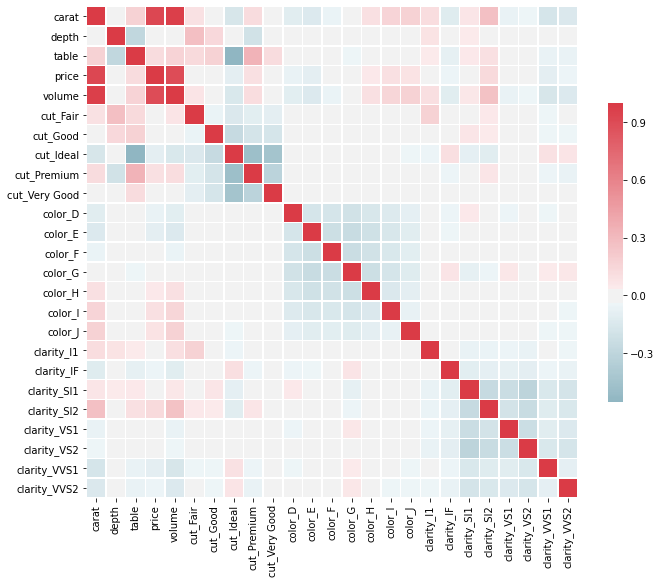

In [4]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(train_dum.corr(), dtype=np.bool))
#I let the mask here in case someone prefers to apply it, however I see more clear inputs without the mask

plt.figure(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_dum.corr(), mask=None, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### As we have seen in the descriptive analysis, the price is highly correlated with carat and volume and also these to independet variables too. The good news is that most of the non linear models take care of this problem. So lets scale our data and train the different models to test

In [5]:
X_t = train_dum.drop(columns={"price"})
y_t = train_dum.price

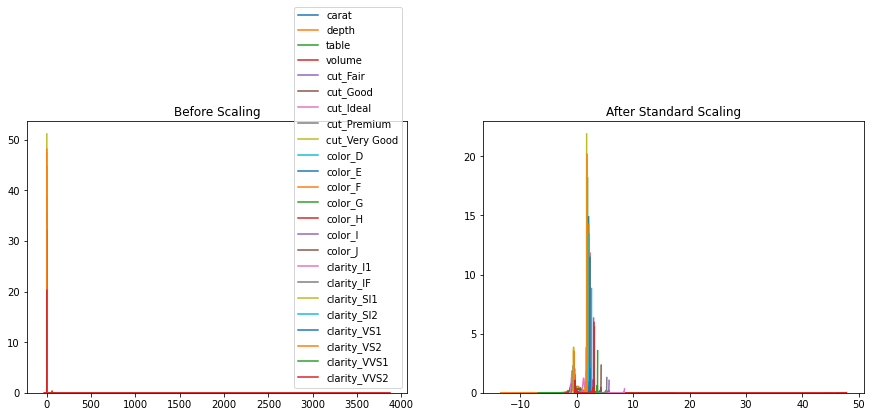

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xss = sc_X.fit_transform(X_t)

train_SS = pd.DataFrame(Xss, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Standard Scaling')
for e in train_SS.columns:
    sns.kdeplot(train_SS[e], ax=ax2, legend=None)
plt.show()

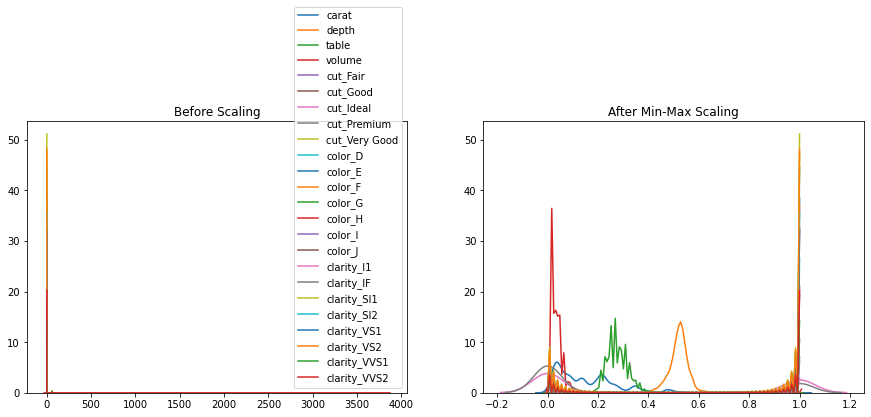

In [7]:
from sklearn.preprocessing import MinMaxScaler
mmc_X = MinMaxScaler()

Xmm = mmc_X.fit_transform(X_t)

train_MM = pd.DataFrame(Xmm, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Min-Max Scaling')
for e in train_MM.columns:
    sns.kdeplot(train_MM[e], ax=ax2, legend=None)
plt.show()

#### After processing the data, the standard scaler looks better to train our models

In [8]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X = train_SS
y = np.ravel(y_t) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32271, 24) (8068, 24) (32271,) (8068,)


In [212]:
#1st select the splited X and y. Then after your model achieves the accuracy needed, train with 100% X and y
#However if you thing you could be overfitting your data you can use the splited model to test
# X, y ----- X_train, y_train
X_training = X
y_training = y

### SVR Regression

In [213]:
from sklearn.svm import SVR

svrReg = SVR(C=1000)

svrReg.fit(X_training, y_training) 
  
svr_pred = svrReg.predict(X_test)

In [214]:
svr_r2 = svrReg.score(X_test, y_test)

svr_rmse = mean_squared_error(y_test, svr_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",svr_r2,"rmse:",svr_rmse)

r2: 0.9753270639852415 rmse: 611.8656909956286


### NuSVR Regression 

In [215]:
from sklearn.svm import NuSVR

nureg = NuSVR(C=1000)

nureg.fit(X_training, y_training) 

nureg_pred = nureg.predict(X_test)

In [216]:
nu_r2 = nureg.score(X_test, y_test)

nureg_rmse = mean_squared_error(y_test, nureg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",nu_r2,"rmse:",nureg_rmse)

r2: 0.9754635534583603 rmse: 610.1709384117732


### KNeighbors Regression

In [217]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors=5, weights="distance", p=1, algorithm="auto")

knnreg.fit(X_training, y_training) 

knnreg_pred = knnreg.predict(X_test)

In [218]:
knn_r2 = knnreg.score(X_test, y_test)

knnreg_rmse = mean_squared_error(y_test, knnreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",knn_r2,"rmse:",knnreg_rmse)

r2: 0.9999297096982336 rmse: 32.658286110406124


### Decision Tree Regressor

In [219]:
from sklearn.tree import DecisionTreeRegressor

dtreereg = DecisionTreeRegressor(min_samples_split=40, max_features="auto")

dtreereg.fit(X_training, y_training) 

dtreereg_pred = dtreereg.predict(X_test)

In [220]:
dtree_r2 = dtreereg.score(X_test, y_test)

dtree_rmse = mean_squared_error(y_test, dtreereg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",dtree_r2,"rmse:",dtree_rmse)

r2: 0.9837233684242377 rmse: 496.96745870940293


### Bagging Regressor

In [221]:
from sklearn.ensemble import BaggingRegressor

bggreg = BaggingRegressor(n_estimators=500, max_samples=30000, max_features=22, bootstrap=True, bootstrap_features=False)

bggreg.fit(X_training, y_training) 

bggreg_pred = bggreg.predict(X_test)

In [222]:
bgg_r2 = bggreg.score(X_test, y_test)

bgg_rmse = mean_squared_error(y_test, bggreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",bgg_r2,"rmse:",bgg_rmse)

r2: 0.9957202078048479 rmse: 254.8337978969738


### Random Forest Regressor

In [223]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=500 ,min_samples_split=40, max_features="auto", min_samples_leaf=1, bootstrap=True)

rfreg.fit(X_training, y_training) 

rfreg_pred = rfreg.predict(X_test)

In [224]:
rf_r2 = rfreg.score(X_test, y_test)

rf_rmse = mean_squared_error(y_test, rfreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",rf_r2,"rmse:",rf_rmse)

r2: 0.9844099881001183 rmse: 486.37238508476753


### Extra Trees Regressor

In [225]:
from sklearn.ensemble import ExtraTreesRegressor

etreg = ExtraTreesRegressor(n_estimators=500 ,min_samples_split=10, max_features="auto", min_samples_leaf=1, bootstrap=True)

etreg.fit(X_training, y_training) 

etreg_pred = etreg.predict(X_test)

In [226]:
et_r2 = etreg.score(X_test, y_test)

et_rmse = mean_squared_error(y_test, etreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",et_r2,"rmse:",et_rmse)

r2: 0.9902004018434675 rmse: 385.6113596474258


### Ada Boost Regressor

In [227]:
from sklearn.ensemble import AdaBoostRegressor

abreg = AdaBoostRegressor(base_estimator=None, n_estimators=10, learning_rate=.1, loss="linear")

abreg.fit(X_training, y_training) 

abreg_pred = abreg.predict(X_test)

In [228]:
ab_r2 = abreg.score(X_test, y_test)

ab_rmse = mean_squared_error(y_test, abreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",ab_r2,"rmse:",ab_rmse)

r2: 0.8741684972174735 rmse: 1381.7846924489922


### Gradient Boosting Regressor

In [229]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(n_estimators=1000, subsample=1, min_samples_split=10, max_features="auto", min_samples_leaf=1, alpha=0.5)

gbreg.fit(X_training, y_training) 

gbreg_pred = gbreg.predict(X_test)

In [230]:
gb_r2 = gbreg.score(X_test, y_test)

gb_rmse = mean_squared_error(y_test, gbreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",gb_r2,"rmse:",gb_rmse)

r2: 0.984777447581987 rmse: 480.60626150998314


### Hist Gradient Boosting Regressor

In [231]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgbreg = HistGradientBoostingRegressor(max_iter=100, max_leaf_nodes=30, min_samples_leaf=2)

hgbreg.fit(X_training, y_training) 

hbreg_pred = hgbreg.predict(X_test)

In [232]:
hgb_r2 = hgbreg.score(X_test, y_test)

hgb_rmse = mean_squared_error(y_test, hbreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",hgb_r2,"rmse:",hgb_rmse)

r2: 0.9850783514404156 rmse: 475.8324862924638


#### As we could imagine by checking the pairplot of the descriptive analysis notebook, our predictions perform better with non linear models. Our dataset has hierarchy in all its ordinal variables, so it makes  the relation of each one of these vars with price non linear

In [206]:
testdf = pd.read_csv("INPUT/diamonds_test.csv")
print(testdf.shape)
testdf.head()

(13449, 10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


#### Compute Volume

In [208]:
testdf["volume"] = testdf.x * testdf.y * testdf.z
index = testdf["Unnamed: 0"]
testdf.drop(columns={"Unnamed: 0","x","y","z"}, inplace=True)

In [209]:
test_dum = pd.get_dummies(testdf)

In [210]:
test_dum.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,60.0,56.0,51.771195,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.34,62.1,57.0,56.244168,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.57,60.3,58.0,260.964240,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.31,61.8,57.0,50.478336,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.51,64.0,60.0,242.355498,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [211]:
Xss_test = sc_X.fit_transform(test_dum)

test_SS = pd.DataFrame(Xss_test, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

#### Now we train our models again but with 100% of the data and take the 3 best

#### Surprisingly, after applying the 100%, the KNN Trees model has the best rmse by far out of all the models

### KNeighbors Regression

In [235]:
knn_test_pred = knnreg.predict(test_SS)

In [236]:
test_knn = pd.DataFrame(knn_test_pred, columns={"price"})
test_knn["id"] = index
test_knn = test_knn[["id","price"]]

In [238]:
test_knn.to_csv("OUTPUT/knn_dummies.csv", index=False)

### Bagging Regressor

In [239]:
bgg_test_pred = bggreg.predict(test_SS)

In [240]:
test_bgg = pd.DataFrame(bgg_test_pred, columns={"price"})
test_bgg["id"] = index
test_bgg = test_bgg[["id","price"]]

In [242]:
test_bgg.to_csv("OUTPUT/bagging_dummies.csv", index=False)

### Extra Trees Regressor

In [243]:
et_test_pred = etreg.predict(test_SS)

In [244]:
test_et = pd.DataFrame(et_test_pred, columns={"price"})
test_et["id"] = index
test_et = test_et[["id","price"]]

In [247]:
test_et.to_csv("OUTPUT/extra_trees_dummies.csv", index=False)

### Hist Gradient Boosting Regressor

In [250]:
hgb_test_pred = hgbreg.predict(test_SS)

In [251]:
test_hgb = pd.DataFrame(hgb_test_pred, columns={"price"})
test_hgb["id"] = index
test_hgb = test_hgb[["id","price"]]

In [253]:
test_hgb.to_csv("OUTPUT/hist_gradient_boosting_dummies.csv", index=False)

#### As conclusions:
    - KNN overfitted our predictions, as in the test had mrse of 32 and with new data it increased to 778
    - Bagging model seems to overfit as well the predicitons, as it increased from 250 of mrse to 549
    - The fearest model tried untill now is Extra Trees, with 385 mrse in the test and 532 with new data

As general conclusion, yes, we can say our data fits better with non linear models, due to the reasons we said before